<a href="https://colab.research.google.com/github/AbrahamKong/CMPE258-Short_Story_Assignment/blob/main/Fast_AI_with_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Change to GPU in Runtime -> Change runtine type

## Install FastAI

In [32]:
# !pip install fastai

## Import Necessary Library

In [33]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')

## Connect To Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
path = Path('/content/drive/MyDrive/Datasets/elephants')
path.ls()

[PosixPath('/content/drive/MyDrive/Datasets/elephants/.DS_Store'),
 PosixPath('/content/drive/MyDrive/Datasets/elephants/test'),
 PosixPath('/content/drive/MyDrive/Datasets/elephants/train'),
 PosixPath('/content/drive/MyDrive/Datasets/elephants/models')]

## Create ImageDataBunch object

In [36]:
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=16, num_workers=8)

In [37]:
# We are creating a fastai DataBunch from our dataset
# Preprocessing takes place when creating the databunch
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=16, num_workers=8)

['African', 'Asian'] 2
840 188


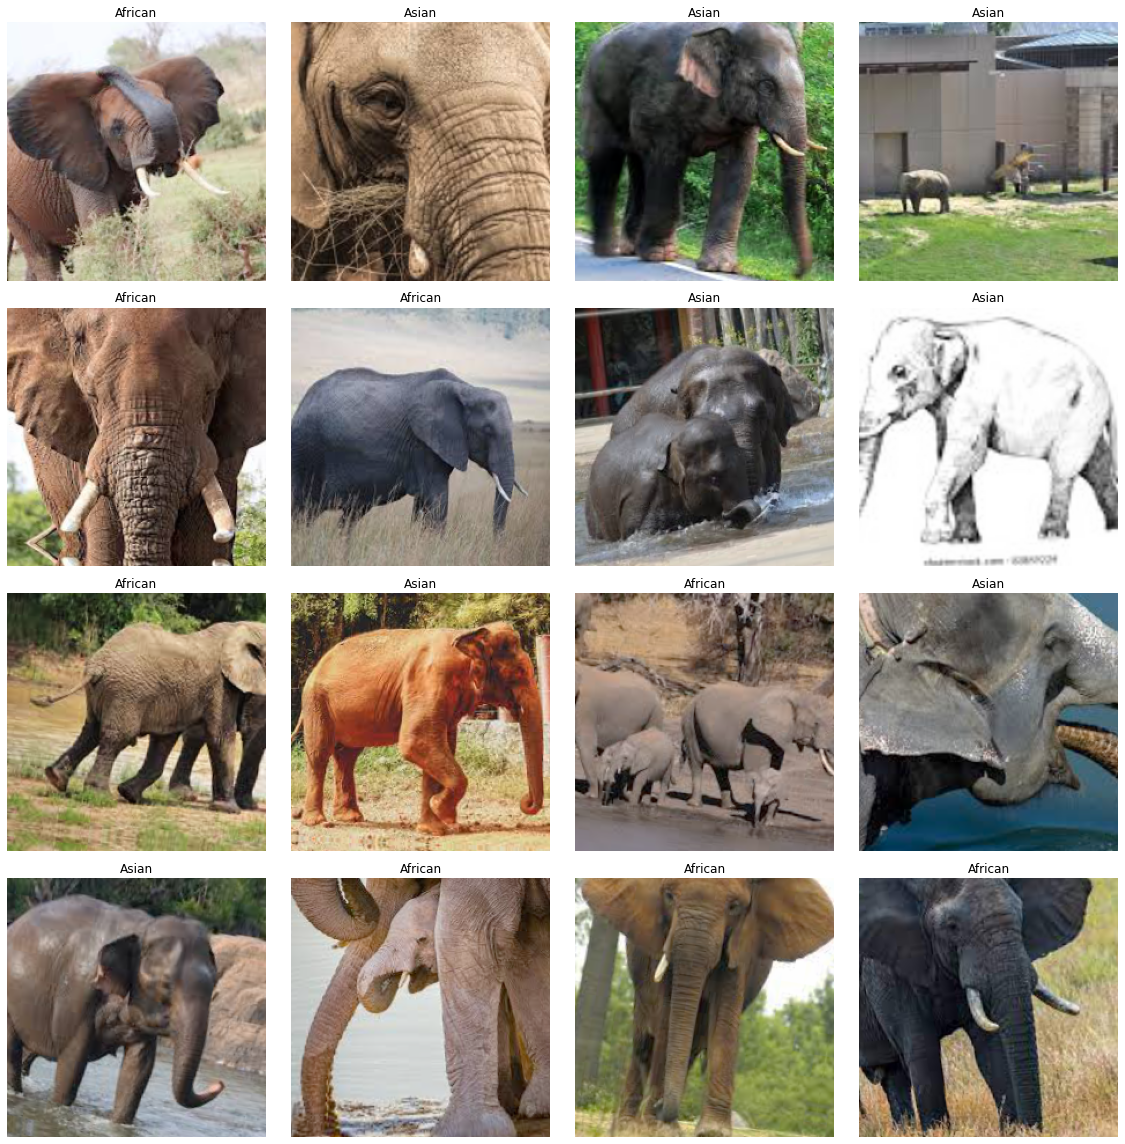

In [38]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

## Visualize Data

840 188


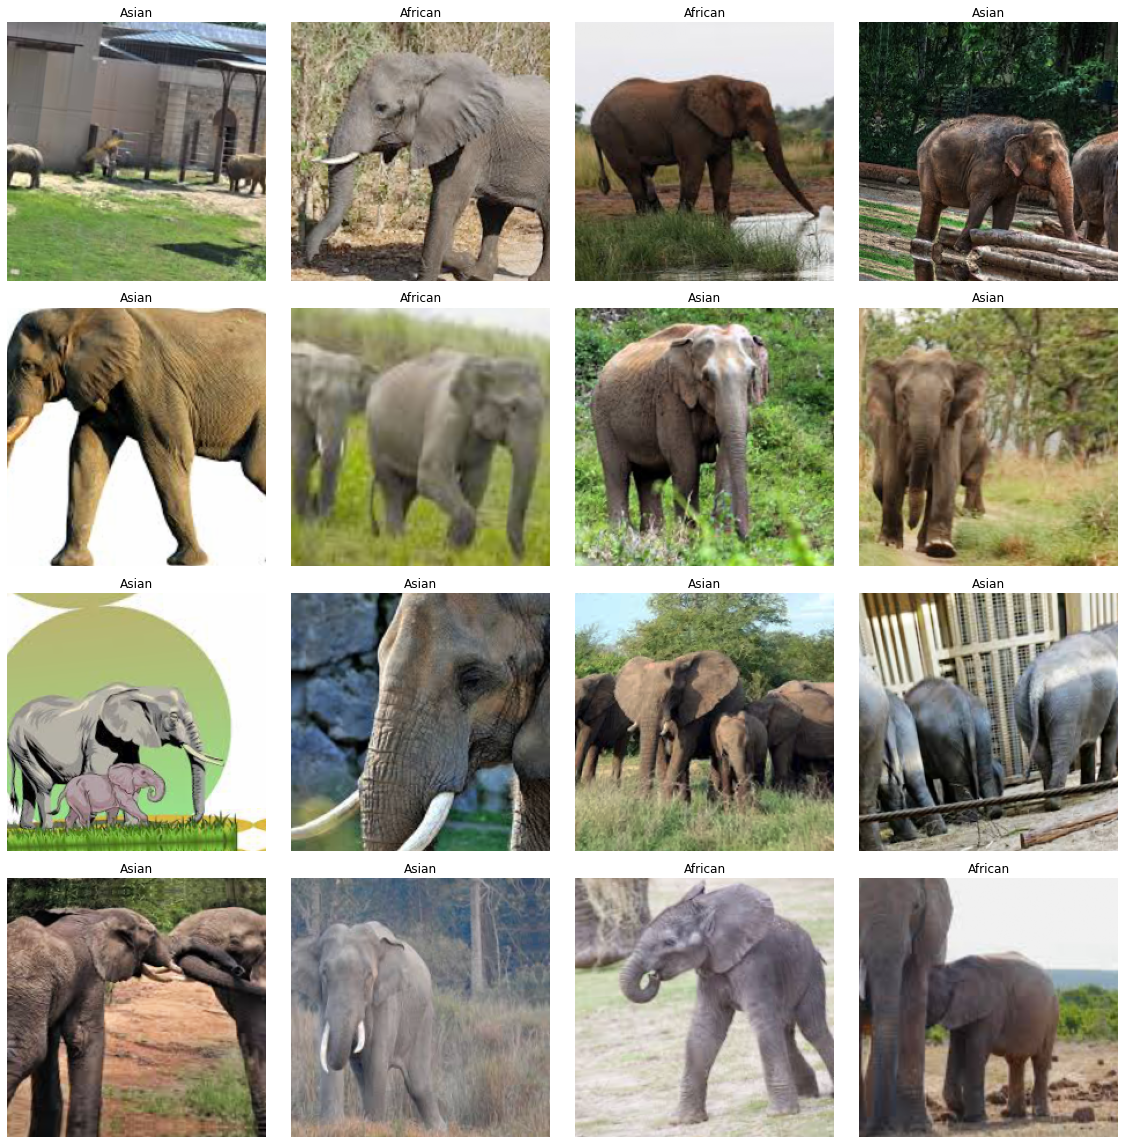

In [39]:
data.show_batch()
print(len(data.train_ds), len(data.valid_ds))

## Create "Learner"

Learner is a model being trained in FastAI

In [40]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

## Train the model using Pre-trained model ResNet50

In [41]:
learn.fit_one_cycle(4)

In [ ]:
# # Train the model on 4 epochs of data at the default learning rate
# learn.fit_one_cycle(4)

In [42]:
# Save the model
learn.save('stage-1')
# Load the Model
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
African,African,African,African,African
Path: /content/drive/MyDrive/Datasets/elephants;

Valid: LabelList (188 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Asian,Asian,Asian,Asian,Asian
Path: /content/drive/MyDrive/Datasets/elephants;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2

## Re-train with mroe layers

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-05
Min loss divided by 10: 9.12E-08


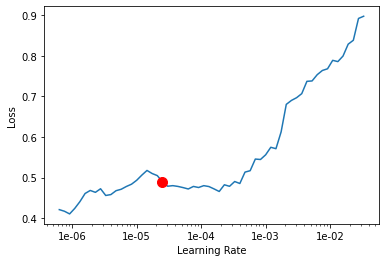

In [43]:
learn.unfreeze()

learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [44]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

## Interpretation

### Create Interpreter Object

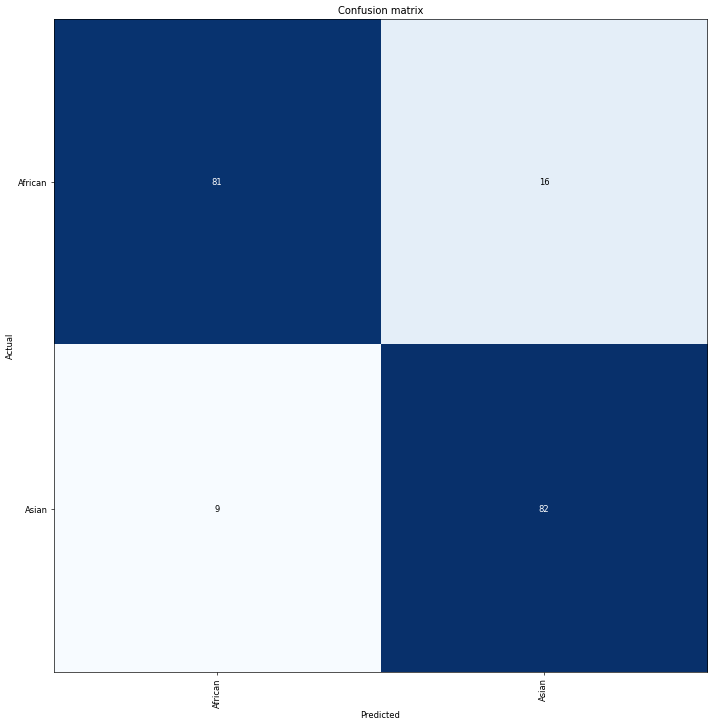

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Text version of the confusion matric

In [46]:
interp.most_confused(min_val=2)

[('African', 'Asian', 16), ('Asian', 'African', 9)]

Reference:

1. [Deep Learning Image Classification with Fastai](https://towardsdatascience.com/deep-learning-image-classification-with-fast-ai-fc4dc9052106)
2. [Deep Learning on imagery using 'fastai.vision' module](https://atmamani.github.io/projects/dl/fastai/vision/)
3. [Image classification using two approches: Pretrained models with Fast.AI and Azure Cognitive Services](https://medium.com/natural-stupidity/image-classification-using-two-approches-pretrained-models-with-fast-ai-38367643e699)

Data Set:
1. [Asian vs African Elephants](https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification)